# Temps d'exécution pour la multiplication des matrices

Import des librairies necessaires pour les graphiques

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

## Matrices

Les matrices utilisées sont les suivantes:

- M1: A(10x30) B(30x20)
- M2: A(20x60) B(60x40)
- M3: A(40x120) B(120x80)
- M4: A(80x240) B(240x160)
- M5: A(160x480) B(480x320)
- M6: A(320x960) B(960x640)

La fonction pour dessiner les graphiques:

In [2]:
def plot_times(n, total_map, total_reduce, scale, step):
    ind = np.arange(n)    # the x locations for the groups
    width = 0.35       # the width of the bars: can also be len(x) sequence

    p1 = plt.bar(ind, total_map, width)
    p2 = plt.bar(ind, total_reduce, width, bottom=total_map)
    
    plt.xticks(ind, tuple([('M%s' % i) for i in range(1, n + 1)]))
    plt.yticks(np.arange(0, scale, step))
    plt.legend((p1[0], p2[0]), ('Map', 'Reduce'))

    plt.show()

## Hadoop MapReduce

### L'algorithme simple

Mesures prises avec un seul reduceur.

#### Le temps de ressources machine

Le temps d'exécution de resources machine est fourni par les compteurs de performances de Hadoop `Job Counters`.
Nous nous sommes intéressés particulièrement aux paramètre `Total time spent by all map tasks (ms)` et
`Total time spent by all reduce tasks (ms)`. Ils fournissent le temps que chaque mappeur et reduceurs utilise 
pour son exécution.

il faut préciser que le temps donné n'est pas celui ressenti par l'utilisateur. C'est le temps total comme si
les mappeurs et reduceurs étaient exécutés en séquentiel alors qu'en réalité ils sont exécutés en parallèle.

C'est important de prendre en compte ce temps et non celui de l'utilisateur car il sera prix en compte pour la facturation par le fournisseur cloud Hadoop.

<IPython.core.display.Javascript object>


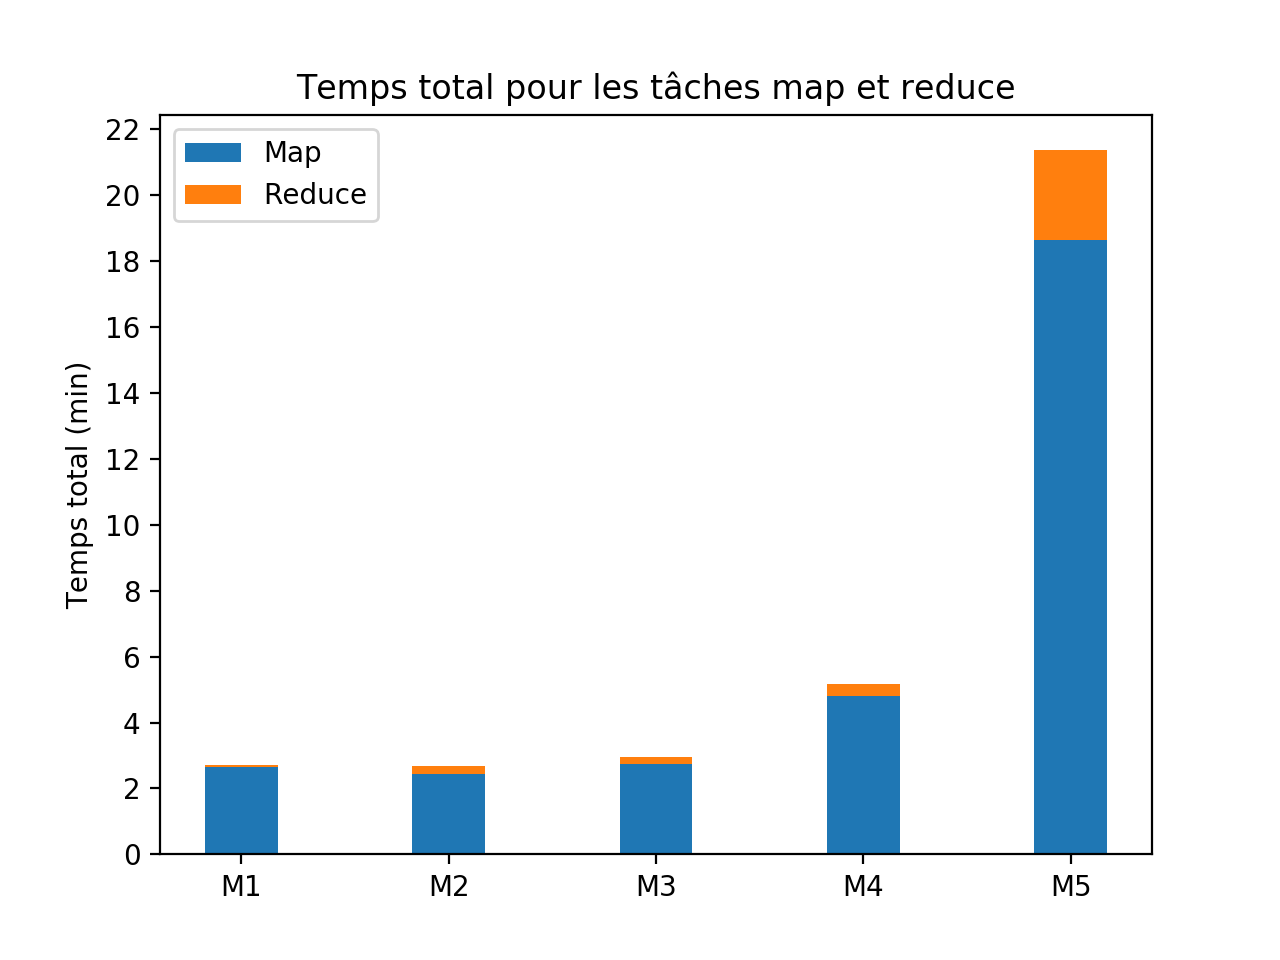

In [3]:
total_time_map_tasks = (158784/60000, 147101/60000, 163655/60000, 288566/60000, 1117308/60000)
total_time_reduce_tasks = (4410/60000, 14077/60000, 13415/60000, 21660/60000, 163731/60000)

plt.figure()
plt.ylabel('Temps total (min)')
plt.title('Temps total pour les tâches map et reduce')

plot_times(5, total_time_map_tasks, total_time_reduce_tasks, 24, 2)

#### Le temps utilisateur

Le temps utilisateur c'est le temps ressenti par l'utilisateur quant à l'exécution du job. C'est à dire que s'il y a plusieurs mappeurs qui s'exécutent en parrallèle, le temps reporté pour la tâche map sera celui du mappeut le plus lent.

Pour cela il faut diviser le temps `Total time spent by all map tasks (ms)` par le nombre de mappeurs qui s'éxecutaient pendent le job. Pareil pour les reduceurs.

<IPython.core.display.Javascript object>


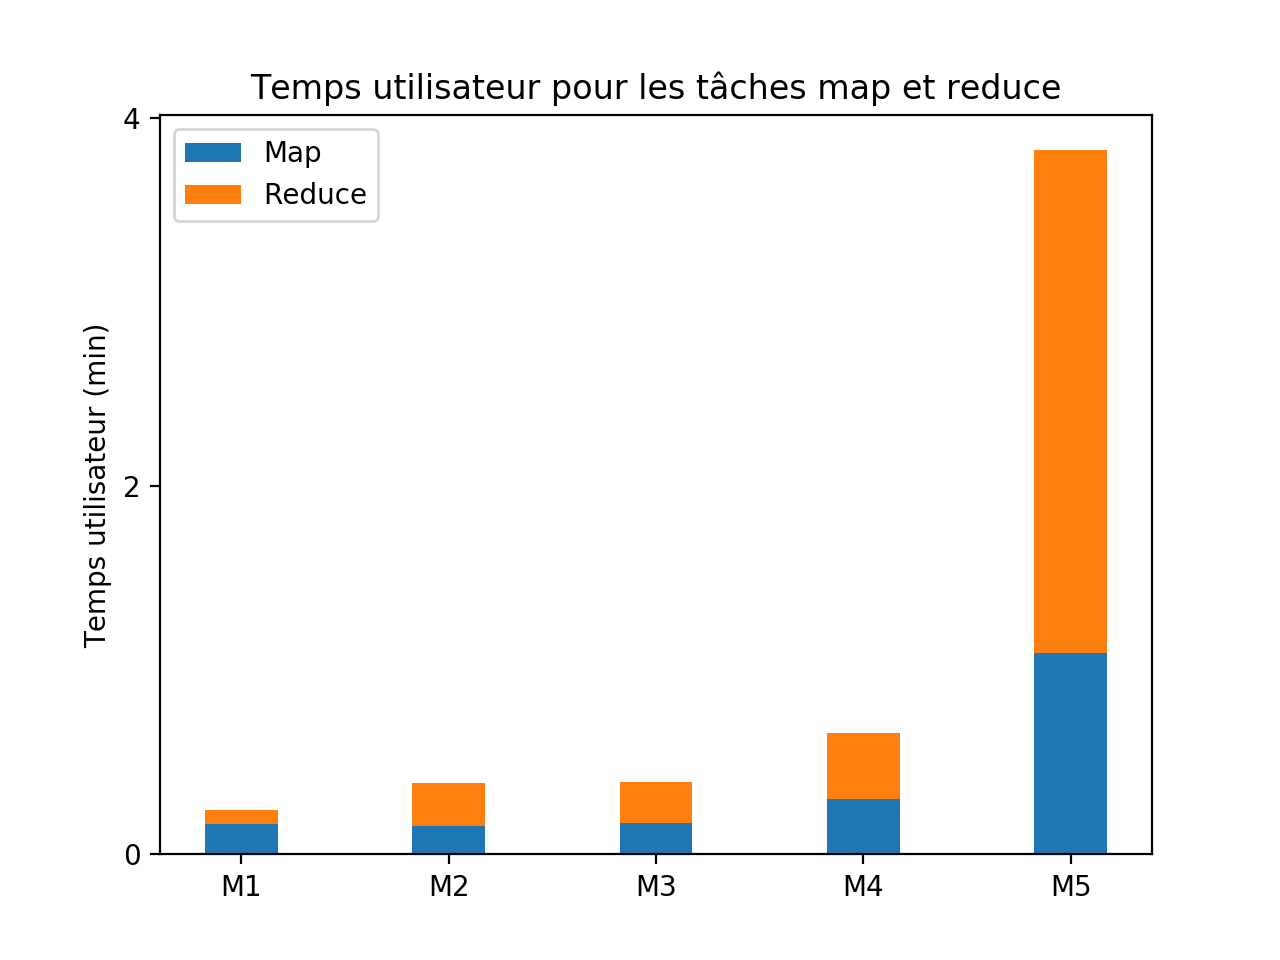

In [4]:
total_time_per_map = (158784/16/60000, 147101/16/60000, 163655/16/60000, 288566/16/60000, 1117308/17/60000)
total_time_per_reducer = (4410/60000, 14077/60000, 13415/60000, 21660/60000, 163731/60000)

plt.figure()
plt.ylabel('Temps utilisateur (min)')
plt.title('Temps utilisateur pour les tâches map et reduce')

plot_times(5, total_time_per_map, total_time_per_reducer, 5, 2)

### L'algorithme avancé (partitionnement en block)

avec 1 reduceur

<IPython.core.display.Javascript object>


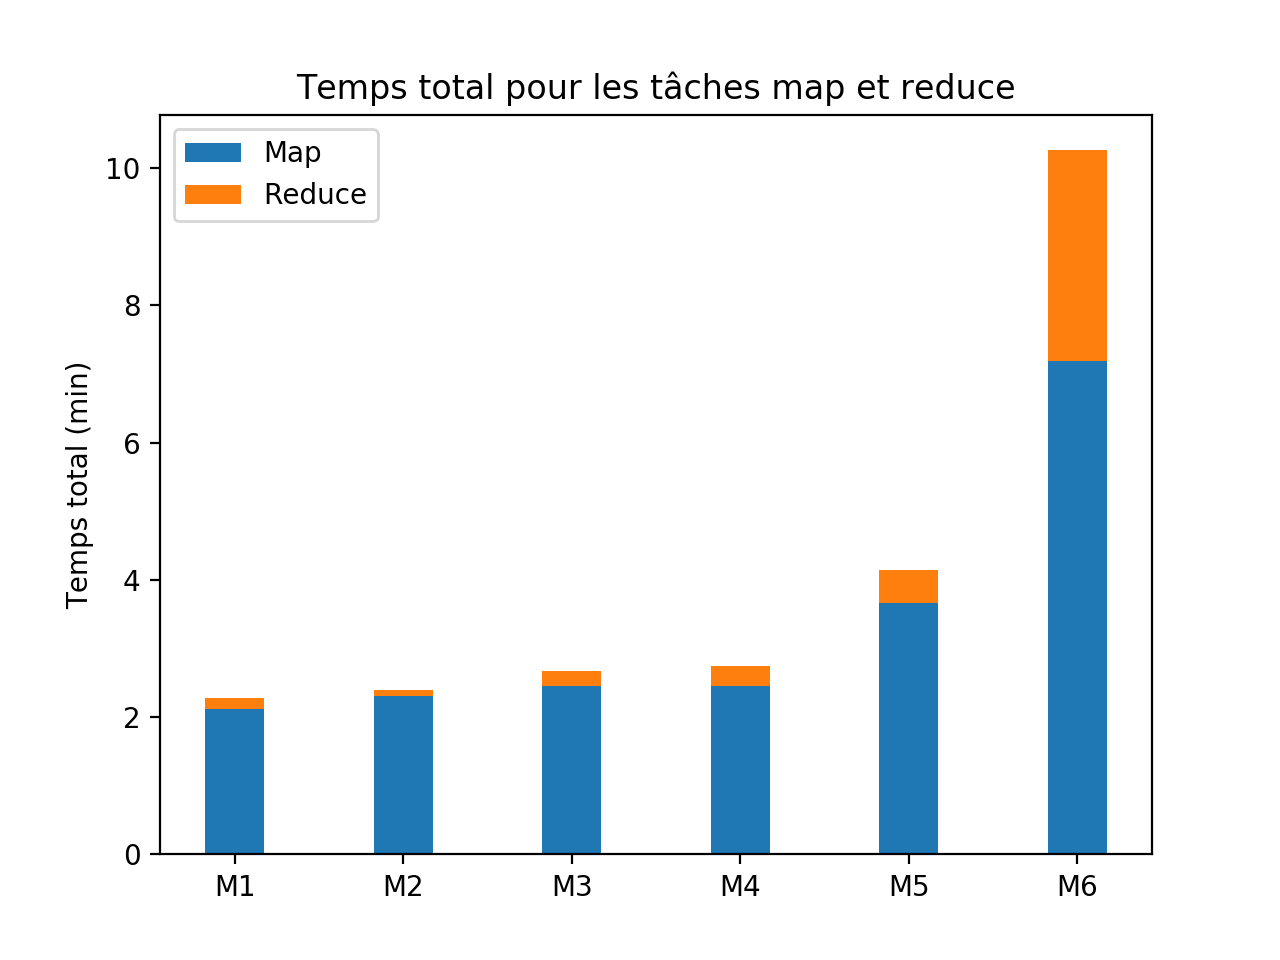

In [5]:
total_time_map_tasks = (126920/60000, 138607/60000, 147479/60000, 147466/60000, 220116/60000, 431089/60000)
total_time_reduce_tasks = (9746/60000, 4987/60000, 13076/60000, 17398/60000, 28068/60000, 184310/60000)

plt.figure()
plt.ylabel('Temps total (min)')
plt.title('Temps total pour les tâches map et reduce')

plot_times(6, total_time_map_tasks, total_time_reduce_tasks, 12, 2)

<IPython.core.display.Javascript object>


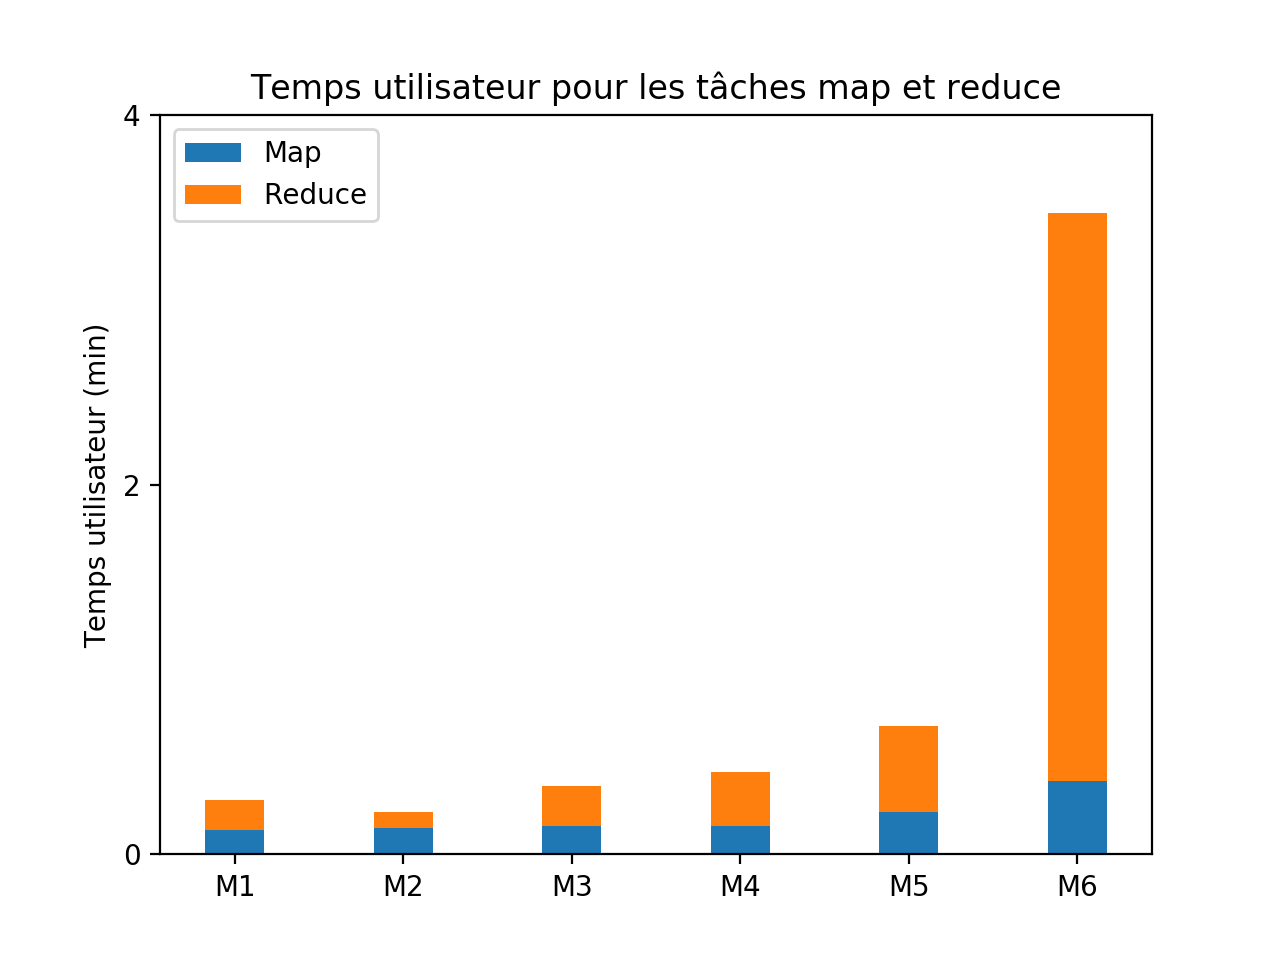

In [6]:
total_time_map_tasks = (126920/16/60000, 138607/16/60000, 147479/16/60000, 147466/16/60000, 220116/16/60000, 431089/18/60000)
total_time_reduce_tasks = (9746/60000, 4987/60000, 13076/60000, 17398/60000, 28068/60000, 184310/60000)

plt.figure()
plt.ylabel('Temps utilisateur (min)')
plt.title('Temps utilisateur pour les tâches map et reduce')

plot_times(6, total_time_map_tasks, total_time_reduce_tasks, 6, 2)

avec 3 reduceurs

<IPython.core.display.Javascript object>


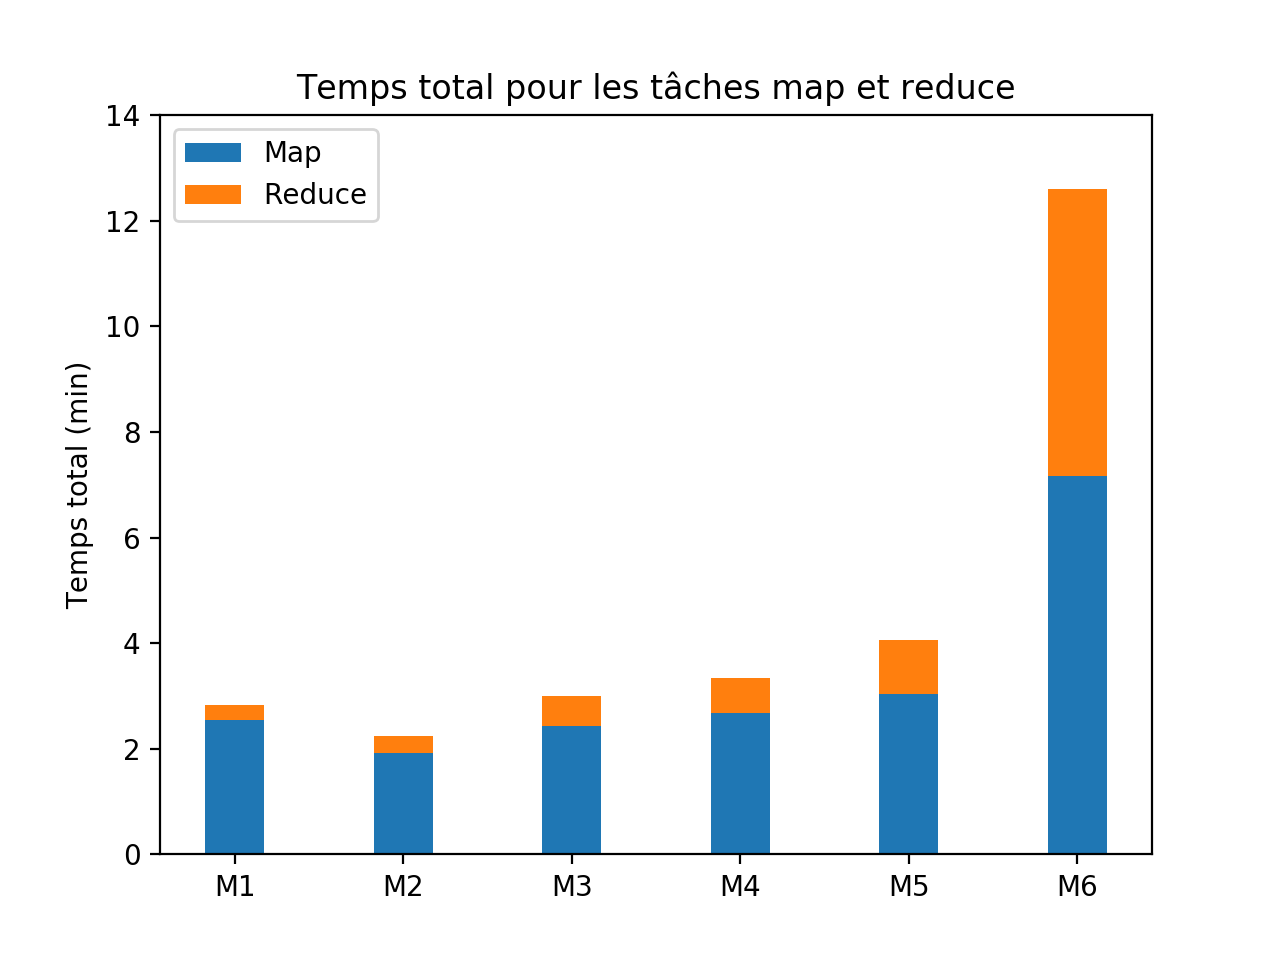

In [7]:
total_time_map_tasks = (152972/60000, 115238/60000, 146219/60000, 160671/60000, 182689/60000, 430124/60000)
total_time_reduce_tasks = (16278/60000, 18897/60000, 34143/60000, 40102/60000, 60695/60000, 326050/60000)

plt.figure()
plt.ylabel('Temps total (min)')
plt.title('Temps total pour les tâches map et reduce')

plot_times(6, total_time_map_tasks, total_time_reduce_tasks, 15, 2)

<IPython.core.display.Javascript object>


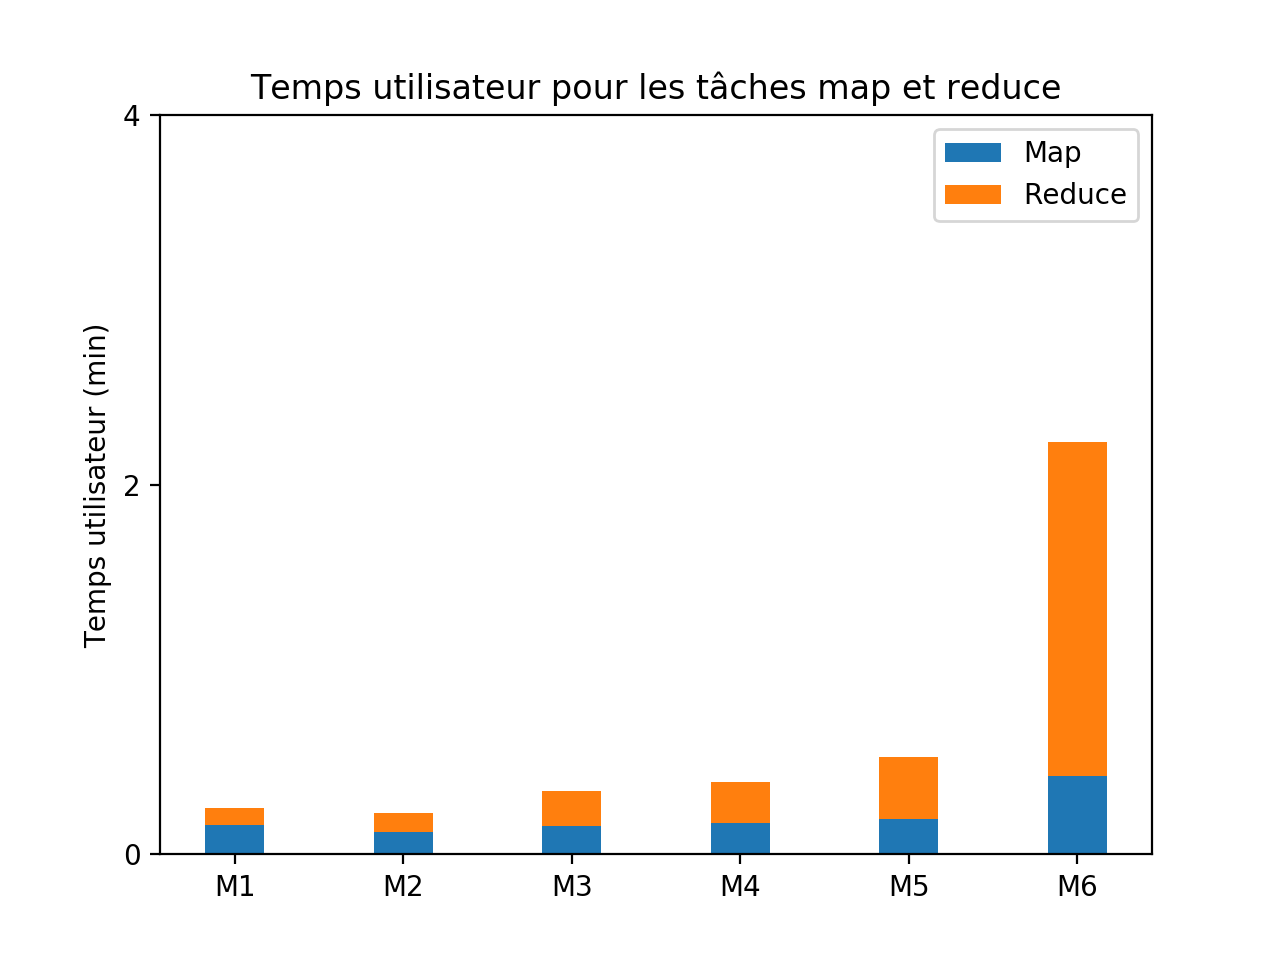

In [8]:
total_time_map_tasks = (152972/16/60000, 115238/16/60000, 146219/16/60000, 160671/16/60000, 182689/16/60000, 430124/17/60000)
total_time_reduce_tasks = (16278/3/60000, 18897/3/60000, 34143/3/60000, 40102/3/60000, 60695/3/60000, 326050/3/60000)

plt.figure()
plt.ylabel('Temps utilisateur (min)')
plt.title('Temps utilisateur pour les tâches map et reduce')

plot_times(6, total_time_map_tasks, total_time_reduce_tasks, 5, 2)

### Conclusion

Il y a un ordre de grander x2 entre chaque matrice M1 à M6. Nous avons mesuré 2 algorithmes. Le premier est une implementation simple et le 2ème est une implémentation avancée avec le partitionnement par block ce qui doit permettre de faire des calculs sur les matrices plus petites. Donc l'algorithme avancé se prette théoriquement plus pour des calculs distribués comme MapReduce Hadoop. L'algorithme avancé a été mesuré dans une configuration avec 1 et 3 reduceurs. Nous avons mesuré les temps d'exécution total pris par les mappeurs et reduceurs et le temps d'utilsiateur. Il faut noter que l'algorithme simple n'a pas pu traiter la matrice M6 car le calcul était trop lent.

Si on prend la configuration avec 1 seul reduceur, l'algorithme avancé est beacuoup plus efficace. Le temps total d'exécution pour l'algorithme simple et la matrice M5 est à peu près de 22 minutes alors que l'algorithme avancé n'a besoin que de 4 minutes. Cela fait une grosse différence au prix du service car ce temps là sera facturé. Quant au temps utilisateur la différence est aussi importante. Pour la matrice M5, le simple a besoin de 4 minutes et l'avancé calcule en moins d'une minute. D'ailleurs l'algorithme avancé traite plus vite la matrice M6 (deux fois plus grande que la M5) que l'algorithme simple ne traite la matrice M5. En temps total et utilisateur.

L'algorithme simple attaint les limites très rapidement. Il est difficile de dire si la progression est exponentielle (il faudrait avoir plus d'éxchantillons) mais en tout cas le temps d'exécution grossisent plus rapidement que les tailles des matrices en entrée.
Pour l'algorithme avancé la progression du temps d'exécution est beaucoup moins importante. Le temps d'exécution grossi moins rapidement que la taille des matrices donc on peut en déduire que sa scalabilité est bonne. Cependnant il faudrait le soumettre encore à des matrices plus grandes et savoir s'il garde cette capacité.

Pour finir, le fait d'activer 3 reduceurs pour l'algorithme avancé réduit le temps d'utilisateur pratiquement par 2 pour la matrice M6 (de 4 min à 2), par contre le temps total d'exécution passe de 10 min à 12min ce qui veut dire qu'on paira la facture un peu plus cher.

A savoir que les temps mesurés sur les matrices M1 à M3 ne sont pas significatifs car les matrices sont certainement pas assez grandes.

L'algorithme avancé est donc beaucoup plus efficace, rapide et scalable.

<IPython.core.display.Javascript object>


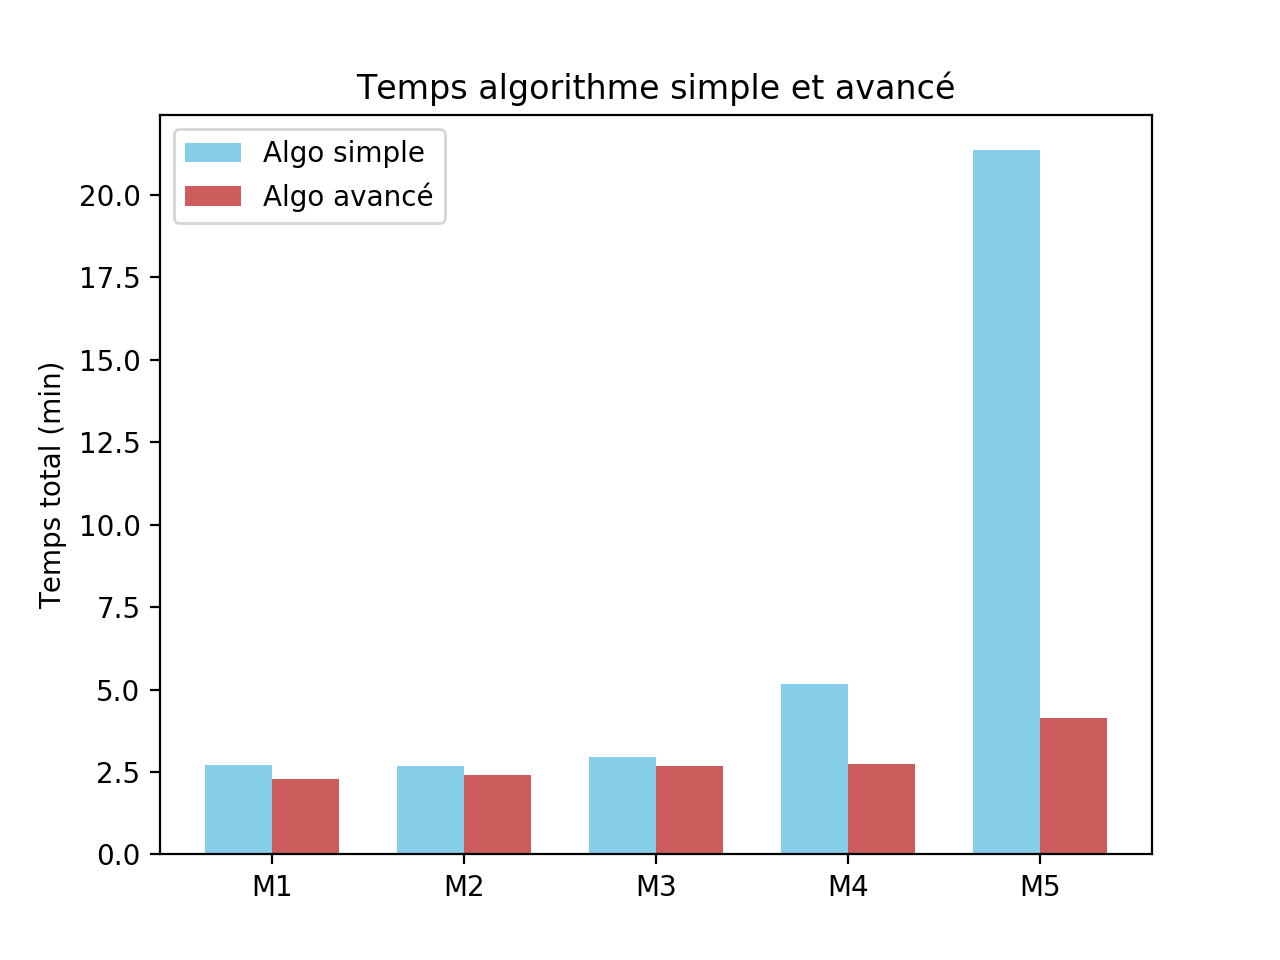

In [9]:
algo_simple = ((158784 + 4410)/60000, (147101 + 14077)/60000, (163655 + 13415)/60000, (288566 + 21660)/60000, (1117308 + 163731)/60000)
algo_avance = ((126920 + 9746)/60000, (138607 + 4987)/60000, (147479 + 13076)/60000, (147466 + 17398)/60000, (220116 + 28068)/60000)

ind = np.arange(len(algo_simple))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, algo_simple, width, color='SkyBlue', label='Algo simple')
rects2 = ax.bar(ind + width/2, algo_avance, width, color='IndianRed', label='Algo avancé')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Temps total (min)')
ax.set_title('Temps algorithme simple et avancé')
ax.set_xticks(ind)
ax.set_xticklabels(('M1', 'M2', 'M3', 'M4', 'M5'))
ax.legend()
plt.show()

<IPython.core.display.Javascript object>


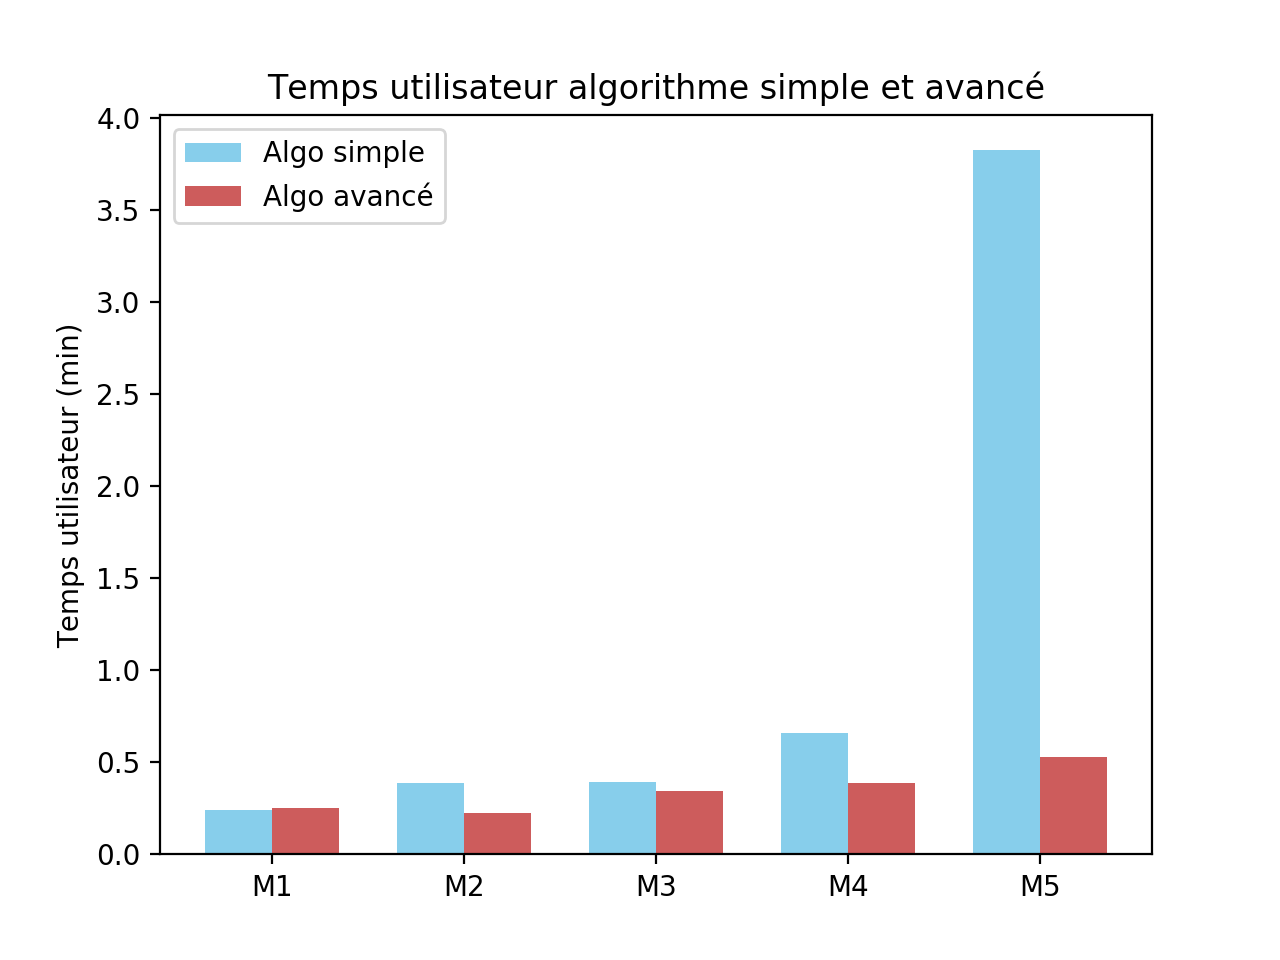

In [10]:
algo_simple = ((158784/16 + 4410)/60000, (147101/16 + 14077)/60000, (163655/16 + 13415)/60000, (288566/16 + 21660)/60000, (1117308/17 + 163731)/60000)
algo_avance = ((152972/16 + 16278/3)/60000, (115238/16 + 18897/3)/60000, (146219/16 + 34143/3)/60000, (160671/16 + 40102/3)/60000, (182689/16 + 60695/3)/60000)

ind = np.arange(len(algo_simple))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, algo_simple, width, color='SkyBlue', label='Algo simple')
rects2 = ax.bar(ind + width/2, algo_avance, width, color='IndianRed', label='Algo avancé')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Temps utilisateur (min)')
ax.set_title('Temps utilisateur algorithme simple et avancé')
ax.set_xticks(ind)
ax.set_xticklabels(('M1', 'M2', 'M3', 'M4', 'M5'))
ax.legend()
plt.show()

## Spark

### L'algorithme simple

#### Le temps de ressources machine

```
#! /usr/bin/env python
import sys
import pyspark
from pyspark.sql import SparkSession
from pyspark.mllib.linalg.distributed import CoordinateMatrix, MatrixEntry
import operator
from contextlib import contextmanager
import time
import logging

import os
os.environ['PYSPARK_PYTHON'] = '/usr/local/anaconda3/envs/spark/bin/python3'

@contextmanager
def time_usage(name=""):
    """log the time usage in a code block
    prefix: the prefix text to show
    """
    start = time.time()
    yield
    end = time.time()
    elapsed_seconds = float("%.4f" % (end - start))
    logging.info('%s: elapsed seconds: %s', name, elapsed_seconds)


logging.getLogger().setLevel(logging.INFO)

def to_matrix_a(x):
    i, j, v = x.split(',')
    return (j, (i, v))

def to_matrix_b(x):
    j, k, v = x.split(',')
    return (j, (k, v))

def to_matrix_entry(x):
    i, j, v = x.split()
    return MatrixEntry(i, j, v)

def multiply_mat(x):
    left = x[1][0]
    right = x[1][1]
    i, v = left
    k, w = right
    return ((i, k), (int(v) * int(w)))

sc = pyspark.SparkContext(appName="Matrix Multiplication")

for i in range(1, 10):
    with time_usage("temps matrix multiplication"):
        matrix_a_raw = sc.textFile(sys.argv[1])
        matrix_b_raw = sc.textFile(sys.argv[2])

        spark = SparkSession(sc)

        entries_a = matrix_a_raw.map(to_matrix_a)
        entries_b = matrix_b_raw.map(to_matrix_b)

        product_entries = entries_a \
            .join(entries_b) \
            .map(multiply_mat) \
            .reduceByKey(operator.add) \
            .map(lambda x:  (x[0][0], x[0][1], x[1]))

        result = product_entries.collect()
```


0.3661666666666667
0.39086666666666664
0.5256777777777777
1.5106111111111111
9.623966666666666
